# Investigate Gapminder data
This website contains datasets about many global facts like 
- CO2  emissions
- Population
- Income
- Child mortality
- Children per woman
and many more. 
In this Project some thesis from a gapminder video shall be checked. 
The video is about question:
- Will saving poor children lead to overpopulation?
https://www.gapminder.org/answers/will-saving-poor-children-lead-to-overpopulation/



## Example questions
Based on the video following thesis and questions are to check and analyse
### Thesis
- Where child mortality is highest population growth fastest!
- For two billion people the average family size is 7 means the family has 5 children respectivly 4 children after one child dies.
- For five billion people the average family size 4 means the family has 2 children.
- Reduce child mortality will reduce the family size.
### Questions

#### Research Question 1: 
#### Is there a correlation between child mortality and children per woman?

#### Research Question 2: 
#### How must be child mortality to get less 2.0 children per woman?

#### Research Question 3: 
#### How ist the distribution of children per woman over the population?

#### Research Question 4:
#### Others stuff you can find in the data.

## Used data sets
To  get answers of this questions following datasest are used
1. Child Mortality: Death of children under five years of age per 1000 children https://www.gapminder.org/data/documentation/gd005/
2. Children per woman (total fertility rate) https://www.gapminder.org/data/documentation/gd008/ 
3. Total population https://www.gapminder.org/data/documentation/gd003/

### Limitations of the used data
- The datasets give the data for countries and years. There is no information how many people live i.e. in cities and how many on country side in a specific country. 
- For the family size the dataset "Children per woman" is used. It is assumed that "Children per woman" and "family size" correlates.
- For the poulation data of a country it is important to know that population not only increase or decrease by children per woman, also migration and immigration are points to change the population


## Data to be analysed (input)
- Child mortality: Children per 1000 dies in age 0-5 years, mean vaules for countries and years [float]
- Children per woman: Total fertility rate, mean values for countries and years [float]
- Population: Number of people in countries. [int]


## Data used to display
- year [int, datetime]
- Sequence [string, list(string)]

## Results (output)
- Population and mean child mortality for countries where the cumulated mean of children per woman is below or equal 2.0
- Population and mean child mortality where the cumulated mean of children per woman is higher 2.0
- Maximum child mortality for countries where the mean children per woman is below 2.0



# Data Wrangling of data set
load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn


In [2]:
# Fuction to standardize values in a column    
def standardize(df):
    return (df - df.mean()) / df.std()

# Fuction to standardize values in a row
def standardize_rows(df):

    mean_diff = df.sub(df.mean(axis='columns'), axis='index')
    return mean_diff.div(df.std(axis='columns'), axis= 'index')


# Fuction to calculate avalue for the correlation
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

def create_range(int_min,int_max,int_intervall):
    array = np.arange(int_min, int_max, int_intervall)
    str_array=[]
    for entry in array:
        str_array.append(str(entry))
    return str_array






## General Properties
In this section the datasets are read, the shape and the content will be displayed

In [3]:
#Read datasets into dataframes
child_mortality_df = pd.read_csv('./data_sets/child_mortality_0_5_year_olds_dying_per_1000_born.csv', index_col=0)
children_per_woman_df = pd.read_csv('./data_sets/children_per_woman_total_fertility.csv', index_col=0)
population_df = pd.read_csv('./data_sets/population_total.csv', index_col=0)

print ('Shape of data frames')
print (child_mortality_df.shape)
print (children_per_woman_df.shape)
print (population_df.shape)







Shape of data frames
(195, 301)
(184, 301)
(195, 301)






The dataframes "child mortality" and population have 195 rows, the dataframe "Children per woman" has 184 rows. All dataframes have 301 columns.

In [4]:

child_mortality_df.columns = pd.to_datetime(child_mortality_df.columns, format='%Y')
children_per_woman_df.columns = pd.to_datetime(child_mortality_df.columns, format='%Y')
population_df.columns = pd.to_datetime(child_mortality_df.columns, format='%Y')



# columns = pd.date_range(pd.datetime(1800, 1, 1), periods=215, freq='YS')

# child_mortality_df.columns
# child_mortality_df[columns]

### Shape of data frames
All data frames contains columns for the years 1800 to 2100. For the data frame child mortality the description of dataset clearly states, that from 2015 the data is a prediction. This columns will be not considered.

Therefore the data for all datasets will only considered up to the year 2014.
The data frame for children per woman contains 184 countries, the data frames for child mortality and population contains 195 countries. To harmonize the data frames they will be reindexed by intersection of indexes.


In [5]:
#Harmonize index countries in dataset
#Master data frame is child_per_woman_df with 184 countries

#create a list for years of interest
years_of_interest = pd.date_range(pd.datetime(1800, 1, 1), periods=215, freq='YS')
xticks = create_range(1800, 2050, 50)


children_per_woman_df = children_per_woman_df[years_of_interest]
children_per_woman_df.columns
intersection = child_mortality_df.index.intersection(children_per_woman_df.index)
child_mortality_df = child_mortality_df.reindex(intersection)[years_of_interest]
intersection = child_mortality_df.index.intersection(population_df.index)
population_df = population_df.reindex(intersection)[years_of_interest]

print ('Harmonized data set shapes')
print (child_mortality_df.shape)
print (children_per_woman_df.shape)
print (population_df.shape)


Harmonized data set shapes
(184, 215)
(184, 215)
(184, 215)


<ipython-input-5-46757c34d19d>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  years_of_interest = pd.date_range(pd.datetime(1800, 1, 1), periods=215, freq='YS')


### General Statistics of data sets
To get an idea of the data sets some years (1800, 1850, 1900, 1950, 2000) of the dataframes child mortality and children per woman will be checked with the decribe function.


In [6]:
example_years = pd.date_range(start='1800', periods=4,  freq='50YS')

print ('\nChild mortality dataframe informations\n')
print (child_mortality_df.info(),'\n')
print ('\nChild mortality statistics\n')
print (child_mortality_df[example_years].describe(),'\n')

print ('\nPopulation dataframe informations\n')
print (population_df.info())
print ('\nPopulation statistics\n')
print (population_df[example_years].describe())
 
print ('\nChildren per woman dataframe informations\n')
print (children_per_woman_df.info(),'\n')
print ('\nChildren per woman statistics\n')
print (children_per_woman_df[example_years].describe(),'\n')


Child mortality dataframe informations

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Columns: 215 entries, 1800-01-01 to 2014-01-01
dtypes: float64(215)
memory usage: 310.5+ KB
None 


Child mortality statistics

       1800-01-01  1850-01-01  1900-01-01  1950-01-01
count  184.000000  184.000000  184.000000  184.000000
mean   424.543478  408.961957  383.923913  212.962500
std     45.319368   62.066276   94.944474  111.013322
min    322.000000  168.000000  105.000000   27.100000
25%    395.750000  373.750000  329.000000  127.500000
50%    423.500000  416.000000  408.500000  212.000000
75%    453.500000  444.000000  439.000000  309.250000
max    540.000000  560.000000  668.000000  448.000000 


Population dataframe informations

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Columns: 215 entries, 1800-01-01 to 2014-01-01
dtypes: int64(215)
memory usage: 310.5+ KB
None

Population statistics

         1800-01-01    1

No handles with labels found to put in legend.


std > 3.5 country:  Haiti , year:  2010-01-01 00:00:00
std < 3.5 country:  Ireland , year:  1864-01-01 00:00:00
std < 3.5 country:  New Zealand , year:  1862-01-01 00:00:00
std > 3.5 country:  Niger , year:  1990-01-01 00:00:00
std < 3.5 country:  Norway , year:  1854-01-01 00:00:00
std > 3.5 country:  Philippines , year:  1902-01-01 00:00:00
std < 3.5 country:  Sweden , year:  1823-01-01 00:00:00


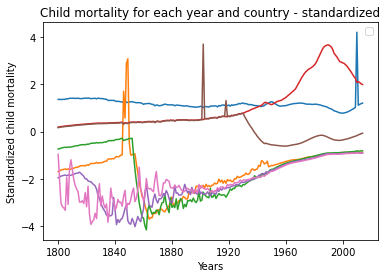

In [7]:
# Standardize the child mortality df
child_mortality_std_df = standardize(child_mortality_df)
outlier=[]


# Search for outlier
for country in child_mortality_df.index:
    if child_mortality_std_df.loc[country].max()>3.5:
        print ('std > 3.5 country: ', country, ', year: ', child_mortality_std_df.loc[country].idxmax())
        plt.plot(child_mortality_std_df.loc[country], linestyle="-",marker="")
        outlier.append(country)
    elif child_mortality_std_df.loc[country].min()<-3.5:
        print ('std < 3.5 country: ', country, ', year: ', child_mortality_std_df.loc[country].idxmin())
        plt.plot(child_mortality_std_df.loc[country], linestyle="-",marker="")
        outlier.append(country)
plt.title('Child mortality for each year and country - standardized')
plt.xlabel('Years')
plt.ylabel('Standardized child mortality')
plt.legend(bbox_to_anchor=(1.0, 1.));


        


No handles with labels found to put in legend.


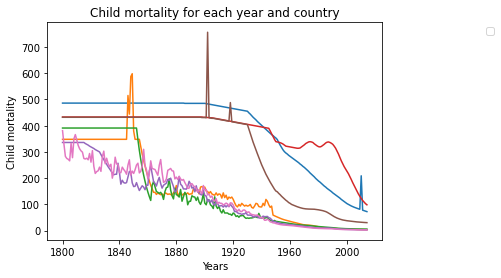

In [8]:
for country in outlier:
    plt.plot(child_mortality_df.loc[country], linestyle="-",marker="")
plt.title('Child mortality for each year and country')
plt.legend(bbox_to_anchor=(1.35, 1.));
plt.xlabel('Years')
plt.ylabel('Child mortality');


The above table and plots show the countries where the child mortality have outliers. All of these outliers are explainable.

- Haiti in the year 2010, there was a big earthquake, many habitants dies it was a big humanitarian crisis.
- Ireland in the year 1864, before this year there was the Irish potato famine in the years 1845 - 1849 in the following years many irish people left irland to the new world America ans also New Zealand. After this time the mortality compared to other countries maybe goes very strong down.
- New Zealand in the year 1862, it was the time that many european people leave there home and emigrates to the new world, America and also New Zealand. Maybe due to many new habitants the child mortality changes drastically.
- Niger in the year 1990, there is a continous development of the child mortality, it s not a single peak as Haiti. In the year 1990 there was the Touareg rebellion. It is a littlebit curious the the mortality with the start of the rebellion decrease. However therefore the development of the mortality is continous I decide to work with this data.
- Norway and Sweden in the years 1854 and 1823, it seems that the mortality changes from year to year in general the mortality is compared to other countries very low.
- Phiippines in the year 1902, there was the Philippine American war from 1899 to 1902 where many philippines habitans dies. Therefore the most victims was not military it is classified as genozid.

All outliers are explainable, therefore I work with this data.

No handles with labels found to put in legend.


std < 3.0 country:  France , year:  1916-01-01 00:00:00
std < 3.0 country:  Ireland , year:  1864-01-01 00:00:00
std > 3.0 country:  Niger , year:  2014-01-01 00:00:00
std < 3.0 country:  Norway , year:  1809-01-01 00:00:00


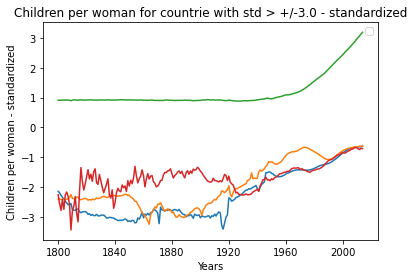

In [9]:

children_per_woman_std_df = standardize(children_per_woman_df)

outlier_children_per_woman=[]
for country in child_mortality_df.index:
    if children_per_woman_std_df.loc[country].max()>3.:
        print ('std > 3.0 country: ', country, ', year: ', children_per_woman_std_df.loc[country].idxmax())
        plt.plot(children_per_woman_std_df.loc[country], linestyle="-",marker="")
        outlier_children_per_woman.append(country)
    elif children_per_woman_std_df.loc[country].min()<-3.:
        print ('std < 3.0 country: ', country, ', year: ', children_per_woman_std_df.loc[country].idxmin())
        plt.plot(children_per_woman_std_df.loc[country], linestyle="-",marker="")
        outlier_children_per_woman.append(country)
plt.title('Children per woman for countrie with std > +/-3.0 - standardized')
plt.legend(bbox_to_anchor=(1.0, 1.));
plt.xlabel('Years')
plt.ylabel('Children per woman - standardized');
        


No handles with labels found to put in legend.


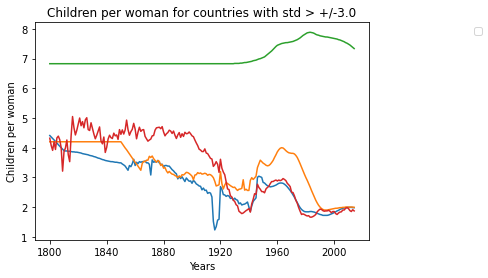

In [10]:
for country in outlier_children_per_woman:
    plt.plot(children_per_woman_df.loc[country], linestyle="-",marker="")
plt.title('Children per woman for countries with std > +/-3.0')
plt.legend(bbox_to_anchor=(1.35, 1.));
plt.xlabel('Years')
plt.ylabel('Children per woman');


For the above plots I can say there are no outliers. Some countries have really high children per woman rate, other very less.
The peak for France was in the first world war. 

<a id='eda'></a>
## Exploratory Data Analysis

No we go to and try to give awnsers to the questions. We start with a plot which shows the development of child mortality, children per woman and population for all countries



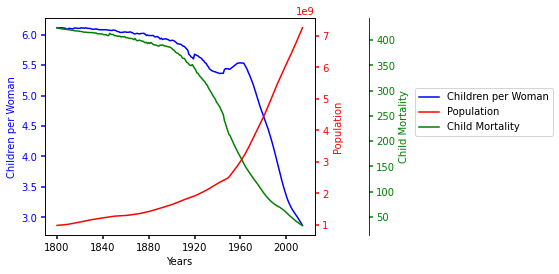

In [11]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(children_per_woman_df.mean(), "b-", label="Children per Woman")
p2, = par1.plot(population_df.sum(), "r-", label="Population")
p3, = par2.plot(child_mortality_df.mean(), "g-", label="Child Mortality")

host.set_xlabel("Years")
host.set_ylabel("Children per Woman")
par1.set_ylabel("Population")
par2.set_ylabel("Child Mortality")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines],bbox_to_anchor=(1.9, .7))


plt.show()



### Research Question 1 
### How is the correlation between child mortality and family size in the past for different countries?


In the next step I want to see how is the correlation between child mortality and children per woman for each year. For this I use the correlation formular 

    std_x = (x - x.mean) / x.std
    
    std_y = (y - y.mean) / y.std
    
    correlation = (std_x * std_y).mean
    
and plot the results over the years into a graph.


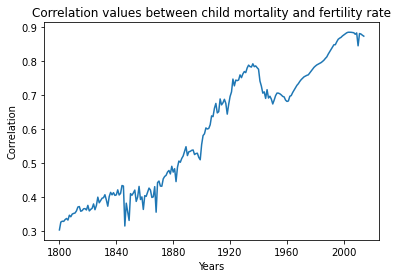

In [12]:
#correlation(child_per_woman_df, child_mortality_df)
plt.plot(correlation(children_per_woman_df, child_mortality_df))
plt.title('Correlation values between child mortality and fertility rate');
plt.xlabel("Years");
plt.ylabel("Correlation");


The correlation increases over the years. In the time frame of second world war the correlation becomes worse but from 1960 the correlation increases again. 
Less children per woman, less mortality rate.
But it is only a correlation not a casual relation. And it is a correlation over all countries it says nothing how must be the mortality rate for a birth rate below or equal 2.0.

To answer this questions we add some correlation plots for country samples and some scatter plots for single countries where children per woman vs. mortallity rate is plotted.


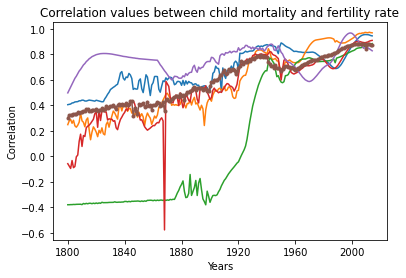

In [13]:
for i in range(5):
    index = children_per_woman_df.sample(10).index 
    plt.plot(correlation(children_per_woman_df.loc[index], child_mortality_df.loc[index]))
#     plt.legend(index)
plt.plot(correlation(children_per_woman_df, child_mortality_df), marker = ".")    
# plt.xticks(xticks);
plt.title('Correlation values between child mortality and fertility rate');
plt.xlabel("Years");
plt.ylabel("Correlation");



No I get a curious situation. I have created 5 correlation plots for samples of size 10 and we get curves very different from the population correlation curve. Off course if we increase the sample size the curves becomes closer to the population curve, what is logical. And when we create many samples the mean of this samples will fit the population correlation. But it is not possible to say that there is every time for each sample a correlation between child mortality and children per woman.
Of course we can see that the correlation values after second world war becomes higher.

But in general we can say, that there is no casual between child mortality and children per woman. I think there are a lot more factors which affacts each other, like economic and educational factors.


### Research Question 2
### How low mus be the mortality to have an impact on children per woman?

To get an idea I analyse now the timeframe  from 1950 - 2014.
First I select group 1: countries wich have in this timeframe a mean children per woman rate less 2.0.
For this countries I plot also the child mortality values.
The same procedure I do for group 2: countries, wich have in this timeframe a mean children per woman rate higher 2.0.



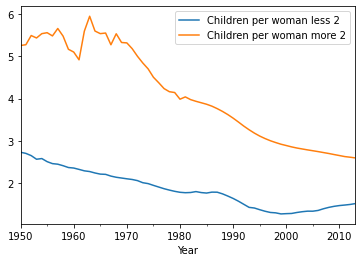

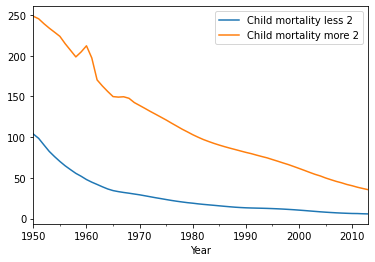

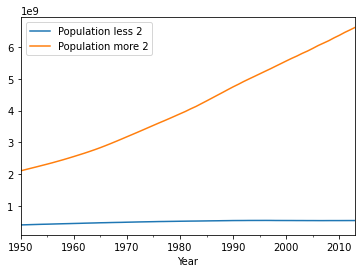

In [14]:
# Index_label = df[df['Updated Price']>1000].index.tolist() 
# start=1990
# xticks = create_range(start, 2011, 5)
start=1950
end=2014

time_frame = pd.date_range(start=str(start), periods=end-start, freq='YS')
weighted_children_per_woman_df = children_per_woman_df * population_df 
weighted_child_mortality_df = child_mortality_df * population_df 


index_label_fertility_less_two = children_per_woman_df[children_per_woman_df[time_frame].mean(axis=1)<2.0].index.tolist()
# print (index_label_fertility_less_two)
index_label_fertility_higher_two = children_per_woman_df[children_per_woman_df[time_frame].mean(axis=1)>2.0].index.tolist()
# print (index_label_fertility_higher_two)


df1=(weighted_children_per_woman_df[time_frame].loc[index_label_fertility_less_two].sum()/
         population_df[time_frame].loc[index_label_fertility_less_two].sum())
df2=(weighted_children_per_woman_df[time_frame].loc[index_label_fertility_higher_two].sum()/
         population_df[time_frame].loc[index_label_fertility_higher_two].sum())
df3=(population_df[time_frame].loc[index_label_fertility_less_two]).sum()
df4=(population_df[time_frame].loc[index_label_fertility_higher_two]).sum()

df5=(weighted_child_mortality_df[time_frame].loc[index_label_fertility_less_two].sum()/
         population_df[time_frame].loc[index_label_fertility_less_two].sum())
df6=(weighted_child_mortality_df[time_frame].loc[index_label_fertility_higher_two].sum()/
         population_df[time_frame].loc[index_label_fertility_higher_two].sum())


df = pd.DataFrame({'Year':df1.index, 'Children per woman less 2':df1.values,'Children per woman more 2':df2.values, 
                   'Population less 2':df3.values, 'Population more 2':df4.values,
                   'Child mortality less 2':df5.values, 
                   'Child mortality more 2':df6.values})
# df2 = pd.DataFrame({'Year':df2.index, 'Children per woman more 2':df2.values})

# df.plot()
df.plot(x='Year', y=['Children per woman less 2','Children per woman more 2'])
df.plot(x='Year', y=['Child mortality less 2', 'Child mortality more 2'])
df.plot(x='Year', y=['Population less 2', 'Population more 2']);


#### Results for Question 2


1. Children per woman less 2.4 for group 1

|        Year | Children per woman less 2 | Children per woman more 2 | Child mortality less 2  |Child mortality more 2  |
|:-|:-|:-|:-|:-|
| 1959-01-01    |               2.370311        |           5.163215|  51.965484 |  204.683204  |

The group 1 has first time in the year 1959 a mean of less 2.4 children per woman. For this year the child mortality for the group 1 was 52

In the next step I ask for the group 2 when first time the mean for child mortality is less than 52.

2. Child mortality less than 52. for group 2 

|        Year | Children per woman less 2 | Children per woman more 2 | Child mortality less 2  |Child mortality more 2  |
|:-|:-|:-|:-|:-|
|2005-01-01  |1.339     |2.766636  |7.856015   |49.863225  |

The group 2 has first time in the year 2005 a mean of less 52 child mortality. For this year the children per woman for group 2 is 2.77 and this is higher as the children per woman rate in the year 1959 from group 1 where child mortality was also less than 52.

Therefore it is not clearly to answer if we get a child mortality value below xxx, than we get also a children per woman value below 2.




#### Research Question 3: 
#### How ist the distribution of children per woman over the population?

Here I want to get an overview how is the distribution of children per woman over the population for some selected years.
First I start with a histogramm from the children per woman dataframe.

In [23]:
bins = np.arange(1.5,8.5,0.5)

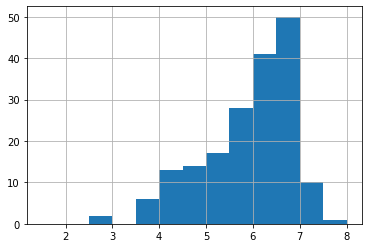

In [25]:
children_per_woman_df['1890-01-01'].hist(bins=bins);

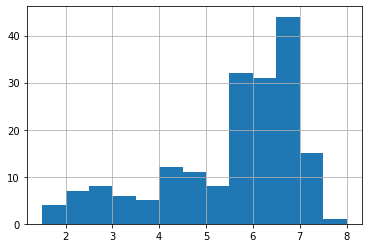

In [26]:
children_per_woman_df['1930-01-01'].hist(bins=bins);

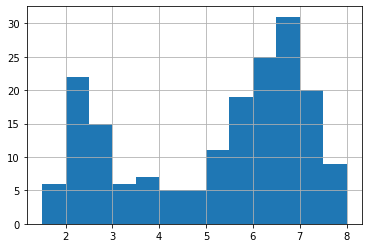

In [27]:
children_per_woman_df['1970-01-01'].hist(bins=bins);

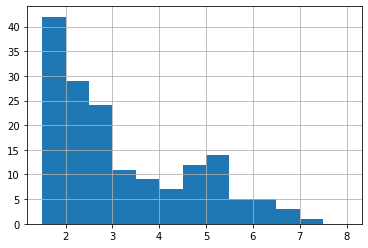

In [28]:
children_per_woman_df['2010-01-01'].hist(bins=bins);

I can find here that more and more countries over the years come into lower children per woman values. But of course the question is not how many countries have a children per woman rate of xy. Maybe you have 70 countries with population from 1 Mio to - 10 Mio and a children per woman rate of 0.0 to 3.0, but when you have another 70 countries with a population of 10 Mio - 100 Mio and a children per woman rate from 3.0 to 6.0 the histogram over number of countries gives not a realistic view.
Want I want to know is the population which have a specific children per woman rate independent from the question which and how many countries are affected.

To get these population over children per woman plots I have to do some tricks. To use directly a histogram was not possible for me. So I decided to create a dataframe where the index representing the bins and the columns for the years contains the summized population. Then I was able to create a bar plot.



In [29]:
start=1800
end=2015

time_frame = pd.date_range(start=str(start), periods=end-start, freq='YS')

children_per_woman_df.head()
population_df.head()

bins = np.arange(1.5,8.5,0.5)

children_population_dict = {}

def create_xy_population_df(bins, xy_df, time_frame):
    for year in time_frame:
        data = []
        index=[]
        for count, values in enumerate(bins):
            if count==0:
                lower = 0
                upper = bins[count]
            else:
                lower = bins[count-1]
                upper = bins[count]

            index.append(str([lower,upper]))

            current_index = children_per_woman_df[(xy_df[year]>=lower) & (xy_df[year]<upper)].index.tolist()
            data.append(population_df[year].loc[current_index].sum())

        children_population_dict[year] = data
    
    children_population_df=pd.DataFrame(children_population_dict, index=index )
    return children_population_df


children_population_df = create_xy_population_df(bins, children_per_woman_df, time_frame)

children_population_df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, [0, 1.5] to [7.5, 8.0]
Columns: 215 entries, 1800-01-01 to 2014-01-01
dtypes: int64(215)
memory usage: 23.6+ KB


Total Population: 2095838200


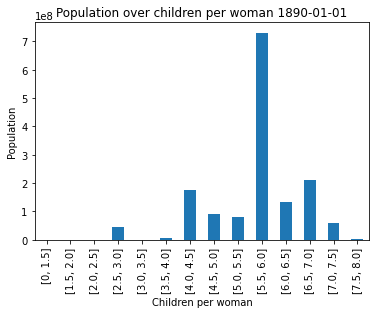

In [30]:
year='1890-01-01'
ax=children_population_df[year].plot.bar();
ax.set_xlabel('Children per woman')
ax.set_ylabel('Population')
ax.set_title('Population over children per woman '+year)
print ('Total Population:', population_df['1930-01-01'].sum())

Total Population: 2095838200


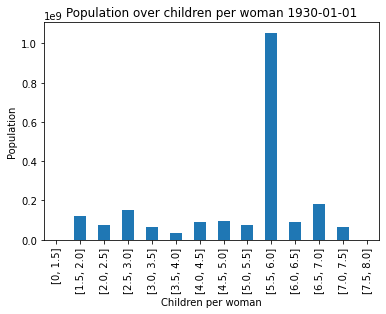

In [31]:
year='1930-01-01'
ax=children_population_df[year].plot.bar();
ax.set_xlabel('Children per woman')
ax.set_ylabel('Population')
ax.set_title('Population over children per woman '+year)
print ('Total Population:', population_df['1930-01-01'].sum())

Total Population: 3677197400


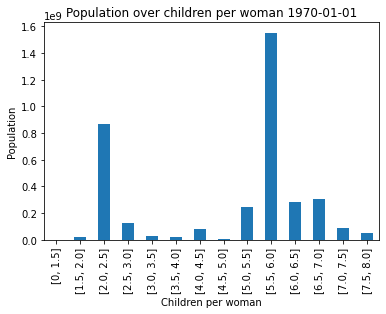

In [32]:
year='1970-01-01'
ax=children_population_df[year].plot.bar();
ax.set_xlabel('Children per woman')
ax.set_ylabel('Population')
ax.set_title('Population over children per woman '+year)
print ('Total Population:', population_df['1970-01-01'].sum())

Total Population: 6915038300


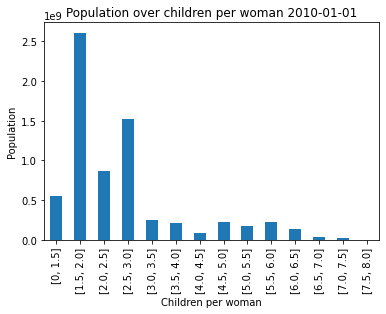

In [33]:
year='2010-01-01'
ax=children_population_df[year].plot.bar();
ax.set_xlabel('Children per woman')
ax.set_ylabel('Population')
ax.set_title('Population over children per woman '+year)
print ('Total Population:', population_df['2010-01-01'].sum())

#### Results for Question 4

The histograms and the bar plots act very similar. In the bar plots I can see very goog, that the population with 5.5 - 6.0 children per woman is really a driver for the population growth. Very slowly for a few hundred million people the children per woman rate starts to decrease, before second world war was starting. Then after second world war 5.5 - 6.0 children per woman has still the highest population, but to have less children than 3 becomes really popular. And finally in the plot of 2010 the less 3 children model becomes the new standard. But still population growth is not stopped.


### Research Question 4: Other interesting findings

In this step I show the plots child mortality, children per woman and population for some selected single countries.
These countries are

['Belarus','Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Estonia', 'Hungary', 'Latvia', 'Lithuania', 'Romania', 'Germany']



Belarus


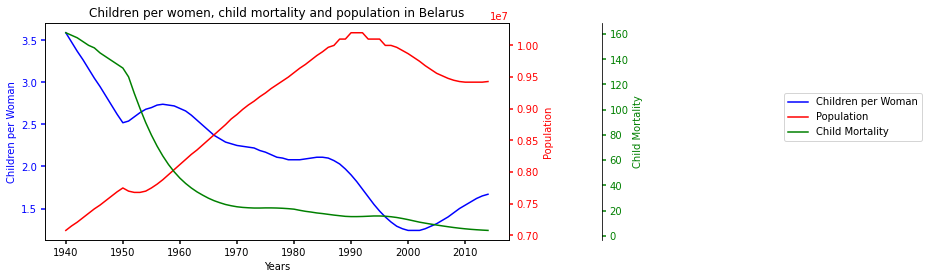

Bosnia and Herzegovina


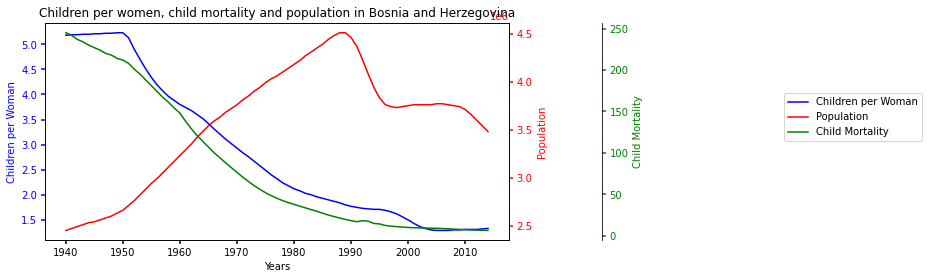

Bulgaria


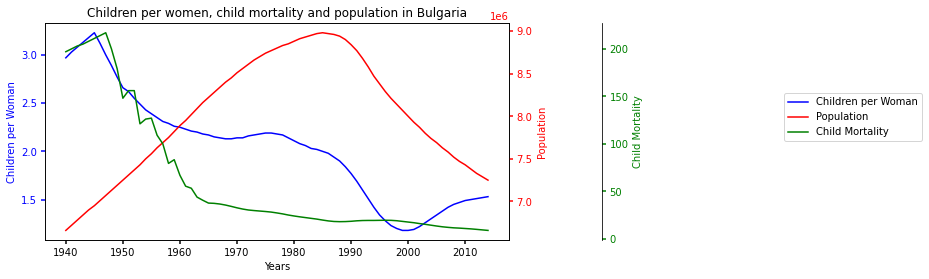

Croatia


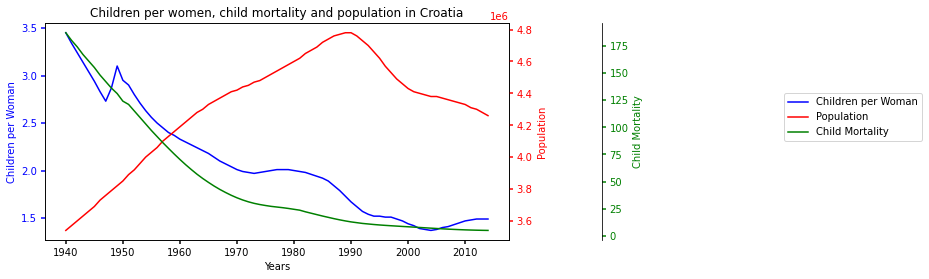

Estonia


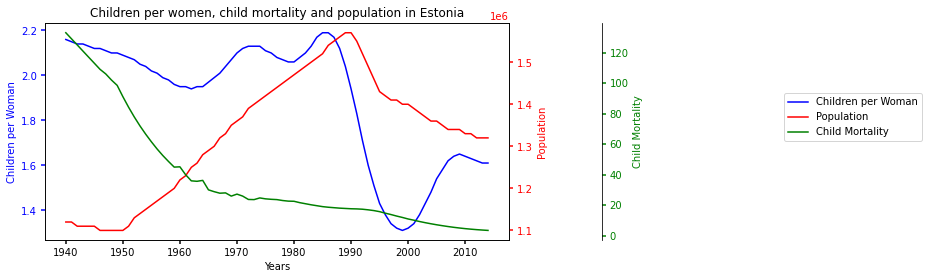

Hungary


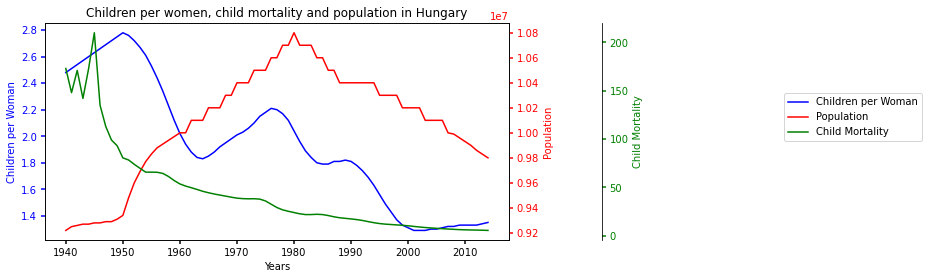

Latvia


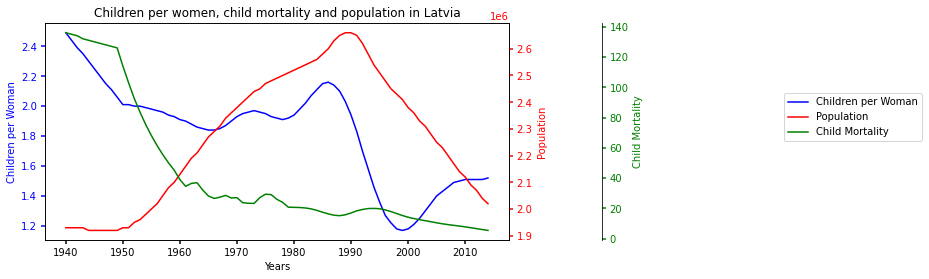

Lithuania


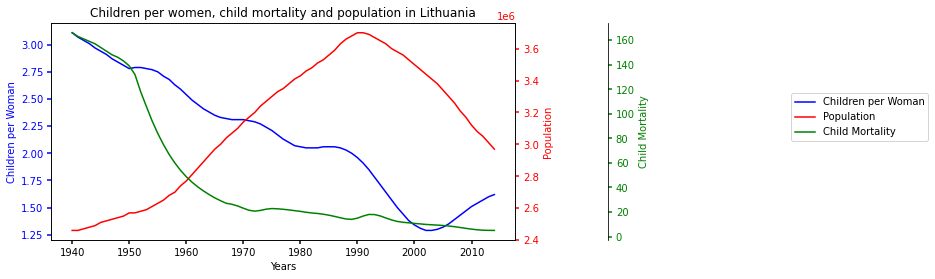

Romania


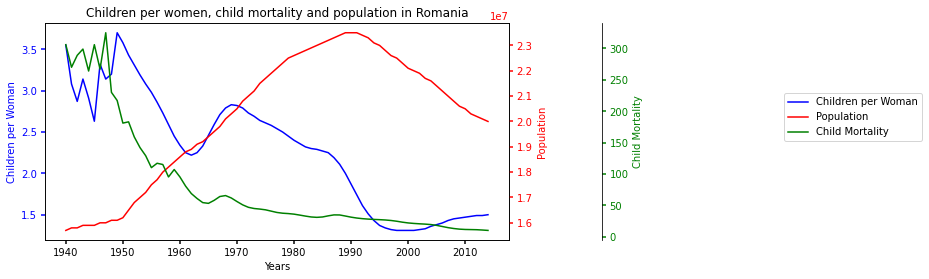

Germany


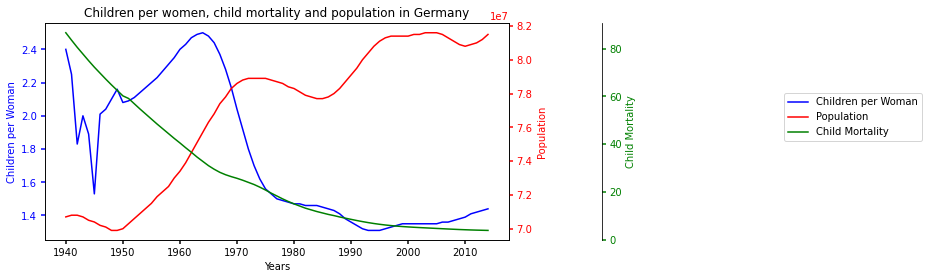

In [34]:
start=1940
end=2015
xticks = create_range(start, end, 5)
# time_frame = create_range(start, end, 1)
time_frame = pd.date_range(start='1940', periods=75, freq='YS')
country='United States'
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


def three_axis_plot(country):
    fig, host = plt.subplots()
    fig.subplots_adjust(right=1.2)
    # plt.figure(figsize=(200,200))


    par1 = host.twinx()
    par2 = host.twinx()

    # Offset the right spine of par2.  The ticks and label have already been
    # placed on the right by twinx above.
    par2.spines["right"].set_position(("axes", 1.2))
    # Having been created by twinx, par2 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par2)
    # Second, show the right spine.
    par2.spines["right"].set_visible(True)

    p1, = host.plot(children_per_woman_df[time_frame].loc[country], "b-", label="Children per Woman")
    p2, = par1.plot(population_df[time_frame].loc[country], "r-", label="Population")
    p3, = par2.plot(child_mortality_df[time_frame].loc[country], "g-", label="Child Mortality")

    host.set_xlabel("Years")
    host.set_ylabel("Children per Woman")
    par1.set_ylabel("Population")
    par2.set_ylabel("Child Mortality")

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), **tkw)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)

    lines = [p1, p2, p3]

    host.legend(lines, [l.get_label() for l in lines],bbox_to_anchor=(1.9, .7))
    plt.title('Children per women, child mortality and population in '+country)
    plt.show()

index=['Belarus','Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Estonia', 'Hungary', 'Latvia', 'Lithuania', 'Romania', 'Germany']
    
for country in index:
    print (country)
    three_axis_plot(country)


All these countries except germany has from 1990 an massive decreasing population. Only in germany the population increase. I think this comes from breaking USSR. It seems also that germany is a profiteur of this situation, I think the increasing population comes also from this east europe countries.
Also very nice to see is the german baby boomer generation from 1950 - 1970.

## Summary

There are many more thinks I can find in the data. It is very interesting to work this such data.
In general yes there is a correlation between child mortality and children per woman but definitly no casual correlation.

It is also not possible to define a child mortality value to go below to get a specific children per woman value. Many more factors like economic success, education and religion will affect the children per woman values. 

In general it is better to save the life of children. To keep the child mortality high will definitly not stop the over population.






